#  HR Employee Attrition Dataset

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

##### Data Understanding and Preparation
    A. Read the ‘HR_Employee_Attrition_Dataset.xlsx’ dataset, check the dimensions and print the first 5 rows.
    B. Check data types and unique values of each column.
    C. Identify and remove unnecessary columns.

In [41]:
df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx') 
print(f'Shape : {df.shape}, and size of Normal File : {df.size}')
df.head()

Shape : (2940, 34), and size of Normal File : 99960


,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

In [43]:
df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [44]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()}');

EmployeeNumber : 2940
Attrition : 2
Age : 43
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [45]:
count = 1
for col in df.columns:
    print(f'{count} -----> {col} : {df[col].unique()}');
    count += 1

1 -----> EmployeeNumber : [   1    2    3 ... 2938 2939 2940]
2 -----> Attrition : ['Yes' 'No']
3 -----> Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
4 -----> BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
5 -----> DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542

 2. Data Exploration and Analysis:
            A. Perform Univariate Analysis on numerical and Categorical data. Share your insights.
            B. Perform detailed Bivariate and Multivariate Analysis on the data and share your insights.

In [46]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x=='No' else 1)
# print(f"Attrition : {df['Attrition'].unique()}")
# df['Attrition'].head(10)

In [47]:
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: 0 if x == 'Non-Travel' else (1 if x == 'Travel_Frequently' else 2))
# print(f"BusinessTravel : {df['BusinessTravel'].unique()}")
# df['BusinessTravel'].head(10)

In [48]:
df['Department'] = df['Department'].apply(lambda x: 0 if x == 'Sales' else (1 if x == 'Research & Development' else 2))
# print(f"Department : {df['Department'].unique()}")
# df['Department'].head(10)

In [49]:
df['JobRole'] = df['JobRole'].apply(lambda x: 0 if x == 'Sales Executive' 
                                                 else (1 if x == 'Research Scientist'
                                                      else (2 if x == 'Laboratory Technician' 
                                                          else (3 if x == 'Manufacturing Director' 
                                                              else (4 if x == 'Healthcare Representative' 
                                                                  else (5 if x == 'Manager' 
                                                                      else (6 if x == 'Sales Representative' 
                                                                          else (7 if x == 'Research Director' else 8))))))))
# print(f"EducationField : {df['EducationField'].unique()}")
# df['EducationField'].head(10)

In [50]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Female' else 1)
# print(f"Gender : {df['Gender'].unique()}")
# df['Gender'].head(10)

In [51]:
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 0 if x == 'Single' else (1 if x == 'Married' else 2))
# print(f"MaritalStatus : {df['MaritalStatus'].unique()}")
# df['MaritalStatus'].head(10)

In [52]:
df['EducationField'] = df['EducationField'].apply(lambda x: 0 if x == 'Other' 
                                                 else (1 if x == 'Life Sciences'
                                                      else (2 if x == 'Medical' 
                                                           else (3 if x == 'Marketing' else 4)))                  
                                                 
                                                 )
# print(f"JobRole : {df['JobRole'].unique()}")
# df['JobRole'].head(10)

In [53]:
df.drop(['EmployeeNumber','Over18','StandardHours','OverTime','DailyRate','HourlyRate'], axis=1, inplace=True)

<Axes: >

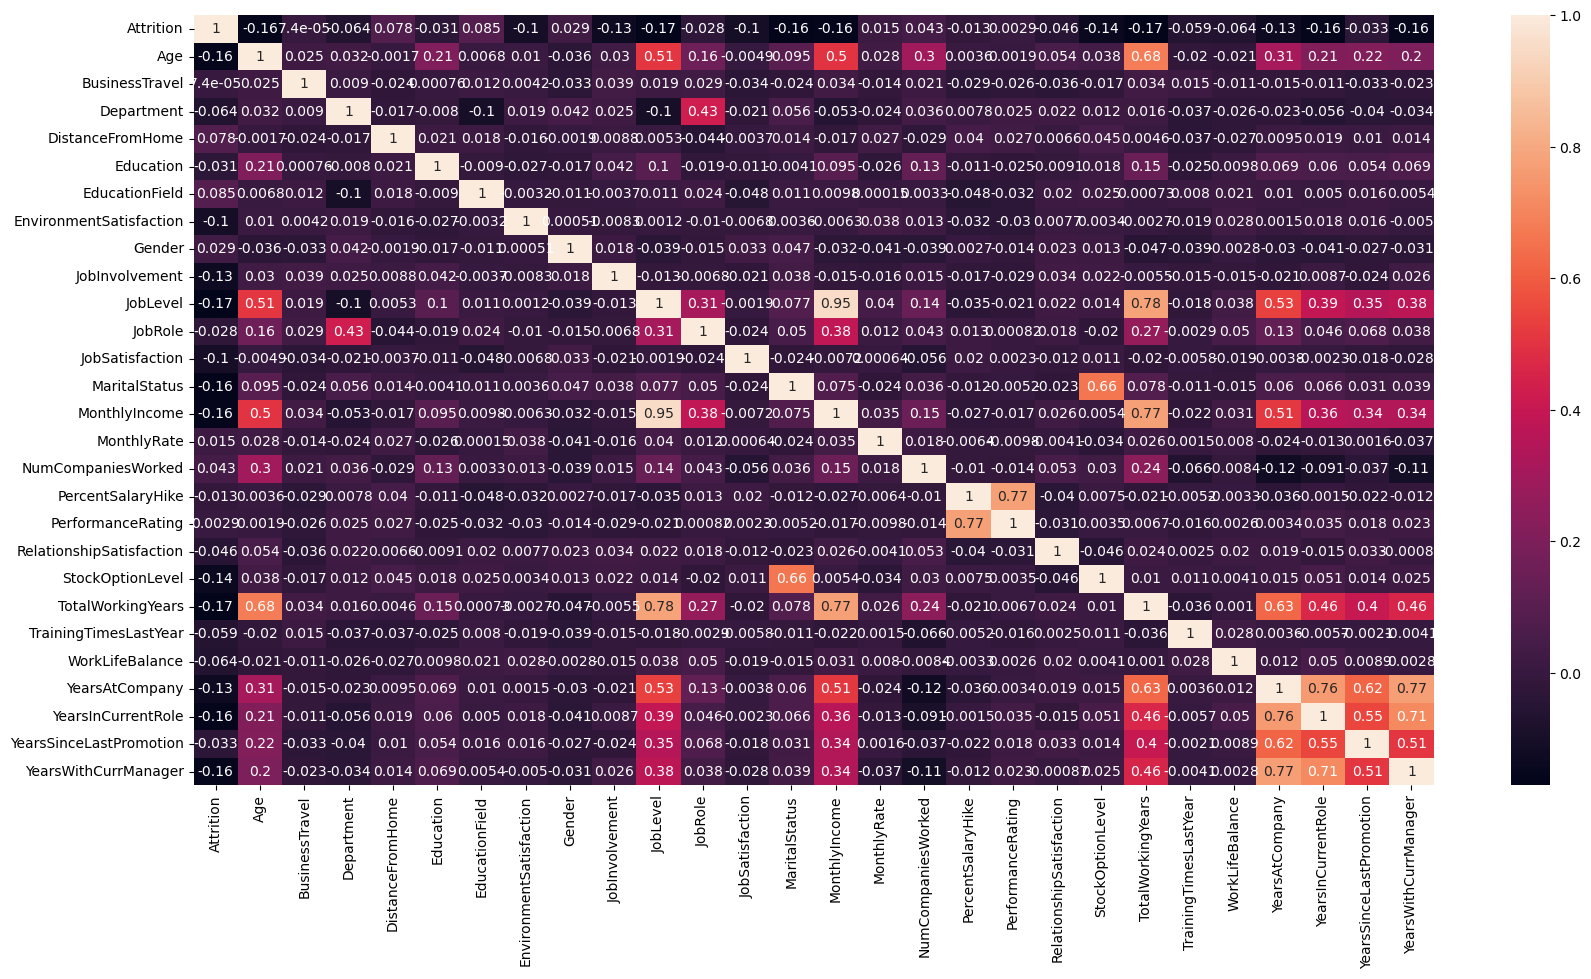

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [55]:
# g = sns.pairplot(df, diag_kind="hist",hue="Attrition",markers=["o", "s"])
# g.map_lower(sns.kdeplot, levels=4, color=".2")

<Axes: xlabel='Education', ylabel='count'>

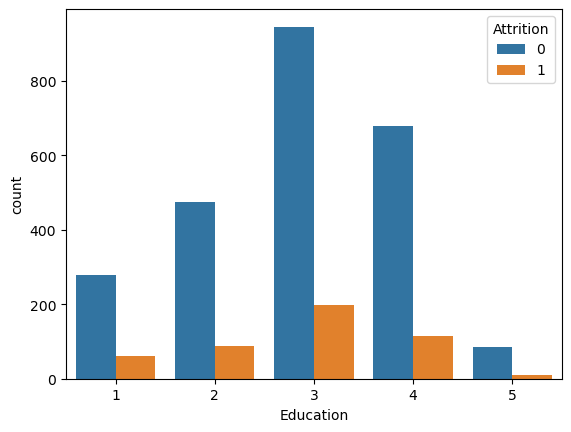

In [56]:
sns.countplot(df, x="Education", hue="Attrition")

<Axes: xlabel='JobLevel', ylabel='count'>

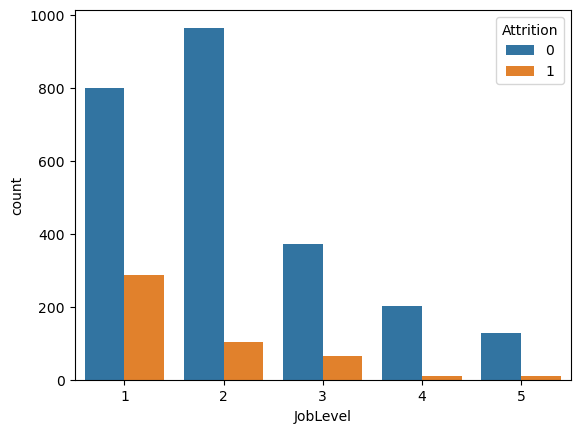

In [57]:
sns.countplot(df, x="JobLevel", hue="Attrition")

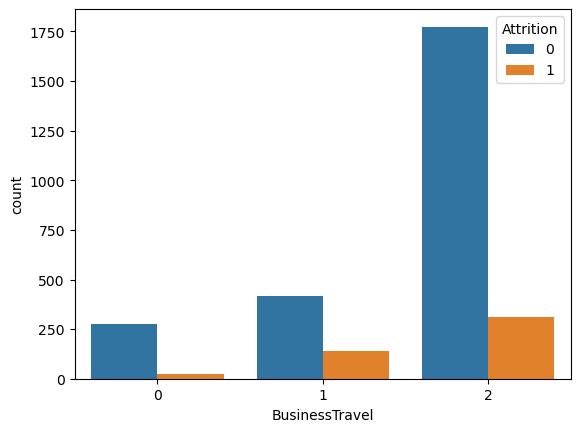

In [58]:
sns.countplot(df, x="BusinessTravel", hue="Attrition");

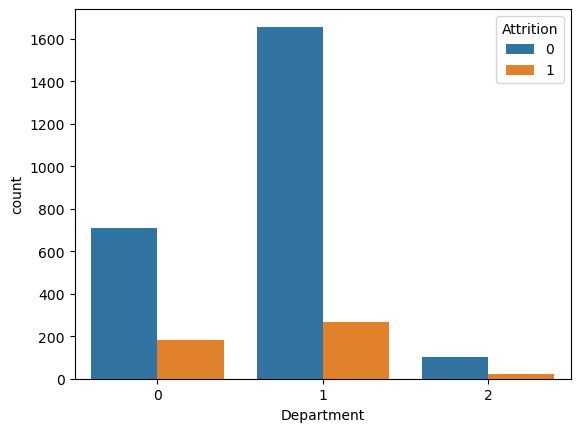

In [59]:
sns.countplot(df, x="Department", hue="Attrition");

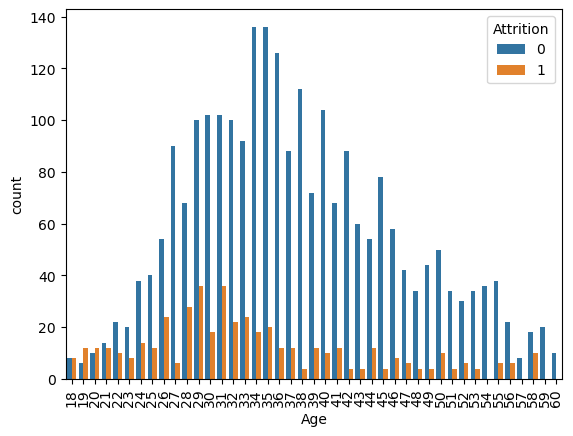

In [60]:
my_plot = sns.countplot(df, x="Age", hue="Attrition")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);

In [61]:
# df['EducationField'].count()
df.groupby (['EducationField','Attrition']) ['Attrition'].count ()

EducationField  Attrition
0               0             142
                1              22
1               0            1034
                1             178
2               0             802
                1             126
3               0             248
                1              70
4               0             240
                1              78
Name: Attrition, dtype: int64

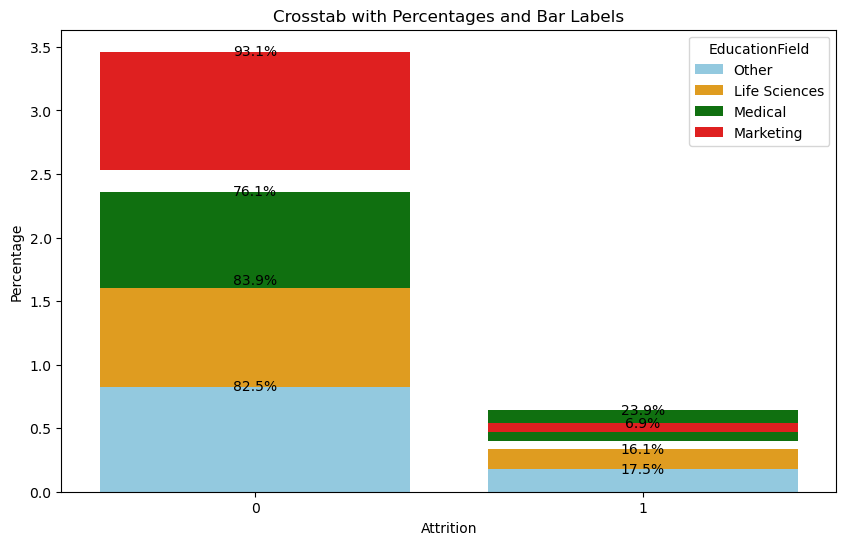

In [62]:
cross_tab = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cross_tab.columns, y=cross_tab.loc[0], color='skyblue', label='Other')
ax = sns.barplot(x=cross_tab.columns, y=cross_tab.loc[1], color='orange', bottom=cross_tab.loc[0], label='Life Sciences')
ax = sns.barplot(x=cross_tab.columns, y=cross_tab.loc[2], color='green', bottom=cross_tab.loc[1] + cross_tab.loc[2], label='Medical')
ax = sns.barplot(x=cross_tab.columns, y=cross_tab.loc[3], color='red', bottom=cross_tab.loc[1] + cross_tab.loc[2]+ + cross_tab.loc[3], label='Marketing')


# Adding percentage labels on top of bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height), ha='center', va='center')

# Setting labels and title
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.title('Crosstab with Percentages and Bar Labels')
plt.legend(title='EducationField')

# Show the plot
plt.show()

In [63]:
df.groupby('EducationField')['Gender'].count().rename("Percentage").transform(lambda x: x/x.sum())
df.reset_index()

,index,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,41,2,0,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,49,1,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,2,1,37,2,1,2,2,0,4,1,...,3,2,0,7,3,3,0,0,0,0
3,3,0,33,1,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,4,0,27,2,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,0,36,1,1,23,2,2,3,1,...,3,3,1,17,3,3,5,2,0,3
2936,2936,0,39,2,1,6,1,2,4,1,...,3,1,1,9,5,3,7,7,1,7
2937,2937,0,27,2,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
2938,2938,0,49,1,0,2,3,2,4,1,...,3,4,0,17,3,2,9,6,0,8


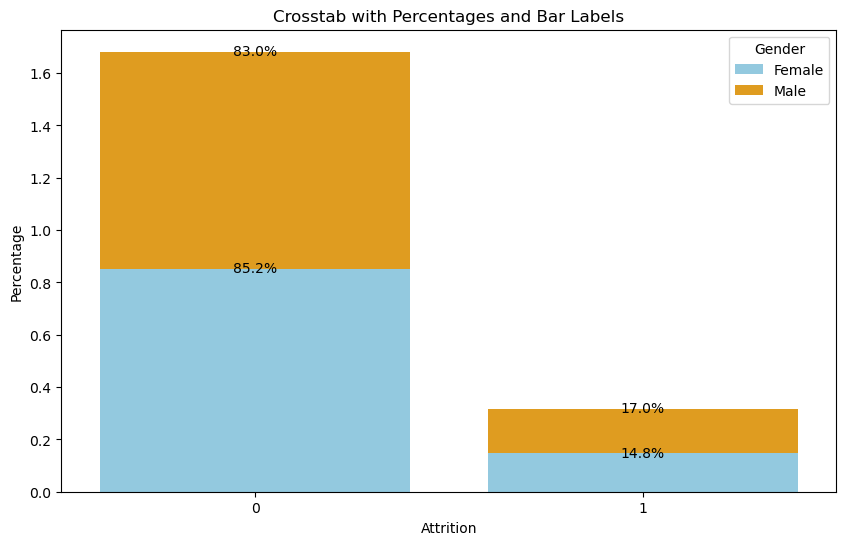

In [64]:
cross_tab = pd.crosstab(df['Gender'], df['Attrition'], normalize='index')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cross_tab.columns, y=cross_tab.loc[0], color='skyblue', label='Female')
ax = sns.barplot(x=cross_tab.columns, y=cross_tab.loc[1], color='orange', bottom=cross_tab.loc[0], label='Male')

# Adding percentage labels on top of bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height), ha='center', va='center')

# Setting labels and title
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.title('Crosstab with Percentages and Bar Labels')
plt.legend(title='Gender')

# Show the plot
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

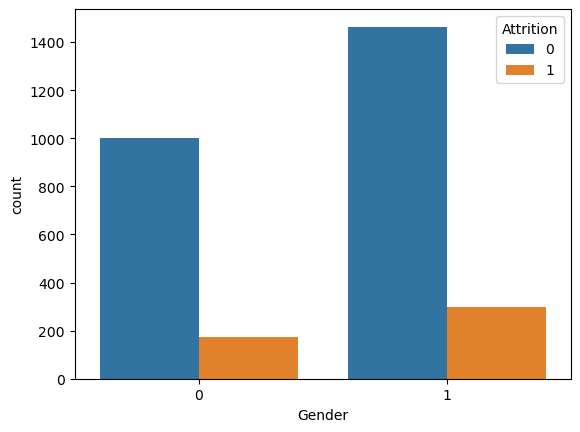

In [65]:
sns.countplot(df, x="Gender", hue="Attrition")

    3. Model Building:
        A. Prepare data for Modeling. Split the data into X and Y.

In [66]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

        B. Partition the data into train and test sets with appropriate proportion.

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

        C. Logistic Regression:
        
            i) Build a Logistic Regression on the train data.
            ii) Print the performance metrics of train and test data. Write your observations.
            iii) Print the coefficients of the models and identify the variables that leads to attrition and those which helps reduce attrition. 

In [68]:
# ii) Build a Logistic Regression on the train data
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)

C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
# iii) Print the performance metrics of train and test data
train_preds = logreg_model.predict(X_train)
test_preds = logreg_model.predict(X_test)

print("Logistic Regression - Train Data:")
print("Accuracy:", accuracy_score(Y_train, train_preds))
print("Classification Report:\n", classification_report(Y_train, train_preds))

print("\nLogistic Regression - Test Data:")
print("Accuracy:", accuracy_score(Y_test, test_preds))
print("Classification Report:\n", classification_report(Y_test, test_preds))


Logistic Regression - Train Data:
Accuracy: 0.8328474246841594
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1723
           1       0.35      0.03      0.06       335

    accuracy                           0.83      2058
   macro avg       0.60      0.51      0.48      2058
weighted avg       0.76      0.83      0.77      2058


Logistic Regression - Test Data:
Accuracy: 0.8435374149659864
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       743
           1       0.54      0.05      0.09       139

    accuracy                           0.84       882
   macro avg       0.69      0.52      0.50       882
weighted avg       0.80      0.84      0.78       882



In [70]:
# iv) Print the coefficients of the model
coefficients = logreg_model.coef_[0]
feature_names = X.columns
coefficients_dict = dict(zip(feature_names, coefficients))

print("\nLogistic Regression Coefficients:")
for feature, coefficient in coefficients_dict.items():
    print(f"{feature}: {coefficient}")


Logistic Regression Coefficients:
Age: -0.007819925984461087
BusinessTravel: 0.0061235573632525174
Department: -0.03573984824060418
DistanceFromHome: 0.0487366320451027
Education: 0.013736625222857032
EducationField: 0.06952729514779225
EnvironmentSatisfaction: -0.11915545564010979
Gender: 0.010475322275996157
JobInvolvement: -0.09056182584934631
JobLevel: -0.010170005923796802
JobRole: -0.003444289306711493
JobSatisfaction: -0.11747440323934139
MaritalStatus: -0.11058121926573734
MonthlyIncome: -0.00014603508099130956
MonthlyRate: 1.875064180220043e-05
NumCompaniesWorked: 0.16832628025248042
PercentSalaryHike: -0.010525419585631792
PerformanceRating: 0.002690589800522693
RelationshipSatisfaction: -0.04386351090189351
StockOptionLevel: -0.11300980417818073
TotalWorkingYears: -0.008332684124776413
TrainingTimesLastYear: -0.11284784472151875
WorkLifeBalance: -0.07437619901601555
YearsAtCompany: 0.08145518386767304
YearsInCurrentRole: -0.12530166835407697
YearsSinceLastPromotion: 0.15500

    D. K-Nearest Neighbours:
        i) Build a KNN Model on the train data.
        ii) Print the performance metrics of train and test data. Write your observations.
        iii) Tune the parameters of the model and print the performance metrics of the tuned model 

In [71]:
# D. K-Nearest Neighbours
# i) Build a KNN Model on the train data
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [72]:
# ii) Print the performance metrics of train and test data
train_preds_knn = knn_model.predict(X_train)
test_preds_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbours - Train Data:")
print("Accuracy:", accuracy_score(Y_train, train_preds_knn))
print("Classification Report:\n", classification_report(Y_train, train_preds_knn))

print("\nK-Nearest Neighbours - Test Data:")
print("Accuracy:", accuracy_score(Y_test, test_preds_knn))
print("Classification Report:\n", classification_report(Y_test, test_preds_knn))



K-Nearest Neighbours - Train Data:
Accuracy: 0.8707482993197279
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1723
           1       0.75      0.31      0.44       335

    accuracy                           0.87      2058
   macro avg       0.82      0.64      0.68      2058
weighted avg       0.86      0.87      0.85      2058


K-Nearest Neighbours - Test Data:
Accuracy: 0.8526077097505669
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       743
           1       0.58      0.24      0.34       139

    accuracy                           0.85       882
   macro avg       0.73      0.60      0.63       882
weighted avg       0.83      0.85      0.83       882



In [73]:
# iii) Tune the parameters of the model and print the performance metrics of the tuned model
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_knn_model = grid_search.best_estimator_
best_knn_preds = best_knn_model.predict(X_test)

print("\nTuned K-Nearest Neighbours - Test Data:")
print("Accuracy:", accuracy_score(Y_test, best_knn_preds))
print("Classification Report:\n", classification_report(Y_test, best_knn_preds))


Tuned K-Nearest Neighbours - Test Data:
Accuracy: 0.9387755102040817
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       743
           1       0.86      0.73      0.79       139

    accuracy                           0.94       882
   macro avg       0.91      0.85      0.88       882
weighted avg       0.94      0.94      0.94       882



##### Compare the performance of the models and write your insights ?<br>
     KNN has more accuracy than the Linear Regression.

##### Business Recommendation: Provide a detailed and useful Business Insights and Recommendation based on your observations and analysis. <br>
    Relation with most of the parameters with the Attrition are Negative, which in turn gives us the sight that what not to do. Few of the insight are to hire more female employee as Attririon by them is lower, the medical field employee trend to leave more HR should work on them on retain, the lesser the age (<35) trend to leave the company, try to regularly promote the employee.